In [1]:
from pipeline_seg import StableDiffusionXLSEGPipeline
import torch
from diffusers.utils import make_image_grid

/home/susung/ENTER/envs/diffusers/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = StableDiffusionXLSEGPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)
device="cuda"
pipe = pipe.to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


In [3]:
prompts = [
"",
]
seed = 10

100%|██████████| 25/25 [00:07<00:00,  3.20it/s]


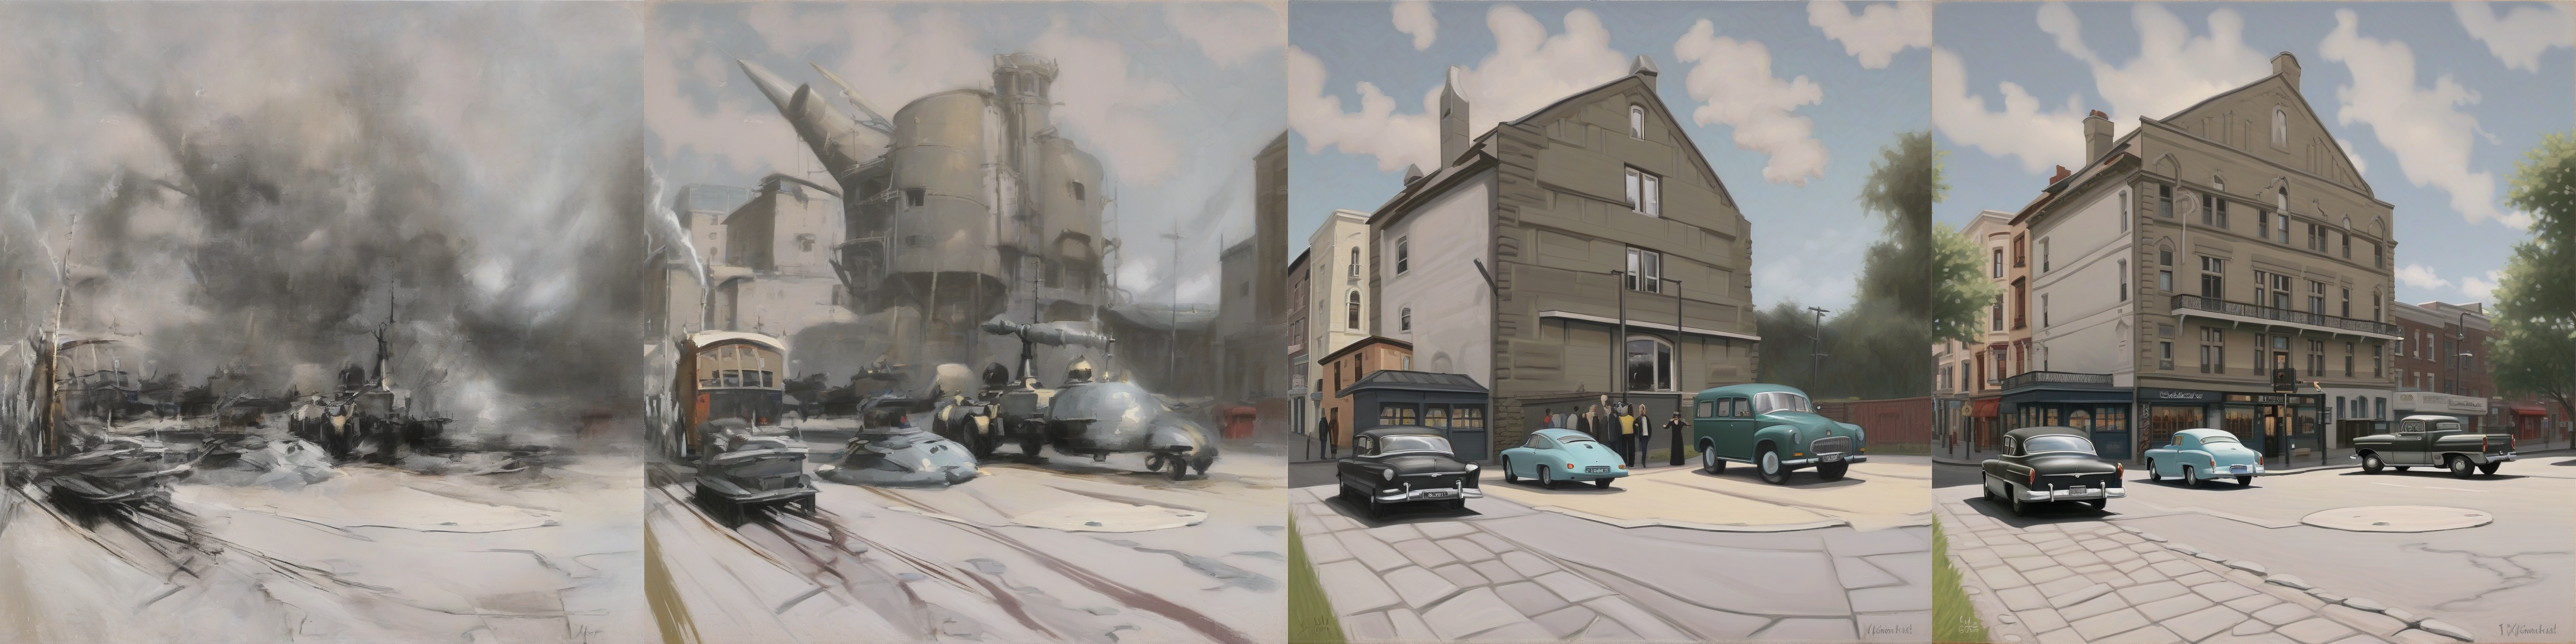

In [4]:
output = []
for prompt in prompts:
    # Original
    generator = torch.Generator(device="cuda").manual_seed(seed)
    output += pipe(
            [prompt],
            num_inference_steps=25,
            guidance_scale=1.0,
            seg_scale=0.0,
            seg_blur_sigma=0.0,
            seg_applied_layers=['mid'],
            generator=generator,
        ).images

    # PEG
    generator = torch.Generator(device="cuda").manual_seed(seed)
    output += pipe(
            [prompt],
            num_inference_steps=25,
            guidance_scale=1.0,
            seg_scale=3.0,
            seg_blur_sigma=1.0,
            seg_applied_layers=['mid'],
            generator=generator,
        ).images
    generator = torch.Generator(device="cuda").manual_seed(seed)
    output += pipe(
            [prompt],
            num_inference_steps=25,
            guidance_scale=1.0,
            seg_scale=3.0,
            seg_blur_sigma=10.0,
            seg_applied_layers=['mid'],
            generator=generator,
        ).images
    generator = torch.Generator(device="cuda").manual_seed(seed)
    output += pipe(
            [prompt],
            num_inference_steps=25,
            guidance_scale=1.0,
            seg_scale=3.0,
            seg_blur_sigma=10000000000.0,
            seg_applied_layers=['mid'],
            generator=generator,
        ).images

grid = make_image_grid(output, rows=len(prompts), cols=4)
grid